# Zadanie domowe - EDA Danych dotyczących Titanica

* Twoim zadaniem jest wykonanie analizy danych zawartych w załączonym pliku CSV (`26__titanic.csv`).
* Plik znajduje się pod video. Pamiętaj, żeby wrzucić plik do tego samego folderu, w którym znajduje się ten notebook.
* Wykorzystaj nowo nabytą wiedzę z biblioteki `Pandas`
* Jeżeli jest taka konieczność posiłkuj się [code explainerem](https://codeexplainer.imprv.ai/) lub / i [data chatterem](https://datachatter.imprv.ai/) (który również te dane ma dostępne).
* Prześlij na discordzie notebook z rozwiązaniem (`#modul-4-zad2`)
* Pamiętaj:

1. Nie spiesz się
2. Potraktuj zadanie domowe jak prawdziwy projekt
3. Dodawaj opisy, obserwacje, wnioski
4. Dodaj wizualizacje
5. Dodaj konkluzję i wnioski końcowe

Powodzenia!!! I mega zabawy!

## O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

![Opis obrazka](https://upload.wikimedia.org/wikipedia/commons/f/fd/RMS_Titanic_3.jpg)

## 1. Ogólny przegląd danych

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)        # Set the display width to a large value

In [2]:
df = pd.read_csv('26__titanic.csv', sep=",")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


#### Po wczytaniu pliku od razu rzuca się w oczy nadmiarowy pusty wiersz z indexem 1309, później go prawdopodobnie usuniemy. Dodatkowo mamy informację, że Titanic przewoził ponad 2200 osób, a baza zawiera tylko trochę ponad 1300 wierszy, co znaczy, że nie mamy danych o wszystkich pasażerach statku. 

In [3]:
# Basic information about the dataset

print("\nBasic information about the dataset:\n")
df.info()


Basic information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


### Możemy zauważyć iż dane nie są kompletne - mamy duże braki w niektórych kolumnach

In [4]:
# Displaying random 10 rows of the dataset

print("Random 10 rows of the dataset:")
df.sample(10)

Random 10 rows of the dataset:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
32,1.0,1.0,"Bonnell, Miss. Caroline",female,30.0,0.0,0.0,36928,164.8667,C7,S,8,NaN,"Youngstown, OH"
913,3.0,1.0,"Karlsson, Mr. Einar Gervasius",male,21.0,0.0,0.0,350053,7.7958,NaN,S,13,NaN,NaN
1258,3.0,1.0,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0.0,2.0,2650,15.2458,NaN,C,C,NaN,NaN
1069,3.0,0.0,"O'Brien, Mr. Thomas",male,NaN,1.0,0.0,370365,15.5000,NaN,Q,NaN,NaN,NaN
983,3.0,0.0,"MacKay, Mr. George William",male,NaN,0.0,0.0,C.A. 42795,7.5500,NaN,S,NaN,NaN,NaN
1281,3.0,0.0,"Waelens, Mr. Achille",male,22.0,0.0,0.0,345767,9.0000,NaN,S,NaN,NaN,"Antwerp, Belgium / Stanton, OH"
1282,3.0,0.0,"Ware, Mr. Frederick",male,NaN,0.0,0.0,359309,8.0500,NaN,S,NaN,NaN,NaN
465,2.0,1.0,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0.0,0.0,SC/AH Basle 541,13.7917,D,C,11,NaN,"New York, NY"
562,2.0,1.0,"Slayter, Miss. Hilda Mary",female,30.0,0.0,0.0,234818,12.3500,NaN,Q,13,NaN,"Halifax, NS"
316,1.0,0.0,"Williams, Mr. Charles Duane",male,51.0,0.0,1.0,PC 17597,61.3792,NaN,C,NaN,NaN,"Geneva, Switzerland / Radnor, PA"


In [5]:
# Checking for duplicate rows 

print("\nChecking for duplicate rows:")
df.duplicated().sum()



Checking for duplicate rows:


0

In [6]:
# Displaying the number of unique values in each column

print("\nUnique values in each column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")


Unique values in each column:
pclass: 3
survived: 2
name: 1307
sex: 2
age: 98
sibsp: 7
parch: 8
ticket: 929
fare: 281
cabin: 186
embarked: 3
boat: 27
body: 121
home.dest: 369


### W naszej próbce danych osób płynących Titaniciem możemy zauważyć, że było 3 klasy biletu. Z ważniejszych informacji możemy również wskazać, że było 27 łodzi ratunkowych i wyłowiono 121 ciał.

In [7]:
# Displaying statistical information about the dataset

print("\nStatistical information about the dataset:")
df.describe().round(2)


Statistical information about the dataset:


,pclass,survived,age,sibsp,parch,fare,body
count,1309.00,1309.00,1046.00,1309.00,1309.00,1308.00,121.00
mean,2.29,0.38,29.88,0.50,0.39,33.30,160.81
std,0.84,0.49,14.41,1.04,0.87,51.76,97.70
min,1.00,0.00,0.17,0.00,0.00,0.00,1.00
25%,2.00,0.00,21.00,0.00,0.00,7.90,72.00
50%,3.00,0.00,28.00,0.00,0.00,14.45,155.00
75%,3.00,1.00,39.00,1.00,0.00,31.28,256.00
max,3.00,1.00,80.00,8.00,9.00,512.33,328.00


### Z ogólnych informacji widać, że najmłodszy pasażer Titanica był noworodkiem (0,17 roku co daje około 2 miesiące) a najstarszy pasażer miał 80 lat (średnia to około 30 lat). Zastanawiające jest też numerowanie ciał - widać, że wyłowiono 121 ciał, ale maksymalny numer na naszej liście to 328.

## 2. Analiza brakujących wartości

In [8]:
# Displaying the number of missing values in each column

print("\nNumber of missing values in each column:")
df.isnull().sum()



Number of missing values in each column:


pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [9]:
# Displaying the number of missing values in each column as a percentage of the total number of rows

print("\nNumber of missing values in each column as a percentage of the total number of rows:")
df.isnull().sum() / df.shape[0] * 100


Number of missing values in each column as a percentage of the total number of rows:


pclass        0.076336
survived      0.076336
name          0.076336
sex           0.076336
age          20.152672
sibsp         0.076336
parch         0.076336
ticket        0.076336
fare          0.152672
cabin        77.480916
embarked      0.229008
boat         62.900763
body         90.763359
home.dest    43.129771
dtype: float64

### Wcześniej zauważyliśmy, że mamy duże braki w niektórych kolumnach, sprawdźmy skąd mogą wynikać. 
- Kolumna `age`     - 20% brakujących danych - cieżko stwierdzić skąd tutaj braki, ale podejrzewam, że przy zakupie biletów nie rejestrowali kiedyś wieku pasażera. 
- Kolumna `cabin`   - 77% braków - wydaje się, że po prostu nie wszyscy mieli przypisane swoje kabiny, przypuszczam, że tylko klasa 1 miała swoje prywatne numerowane kabiny
- Kolumna `boat`    - 63% pustych wierszy - łatwo stwierdzić, że po prostu nie wszyscy zmieścili się na łodzie ratunkowe - stąd tak duże braki
- Kolumna `body`    - 90% braków - po pierwsze ocaleni prawdopodobnie nie zostali ponumerowani (jeszcze sobie zweryfikujemy zaraz) a po drugie nie wszyscy zostali odnalezieni - stąd tak duże braki w tej kolumnie
- Kolumna `home.dest`- prawdopodobnie nie wszyscy podróżujący zadeklarowali dokąd się udają

In [10]:
# Displaying survived passengers and check if they are body numbers

print("\nSurvived passengers and check if they are body numbers:")
df[df['survived'] == 1]['body'].notnull().sum()


Survived passengers and check if they are body numbers:


0

### Jak przypuszczaliśmy żaden z ocalałych nie został oznaczony numerem

In [11]:
# Show rows where all values are missing

print("\nRows where all values are missing:")
df[df.isnull().all(axis=1)]


Rows where all values are missing:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Remove rows with all missing values

df.dropna(how='all', inplace=True)

### Pozbyliśmy się jednego całkowicie pustego wiersza

## 3. Analiza pojedynczych zmiennych


Number of survivors and non-survivors:
0.0    809
1.0    500
Name: survived, dtype: int64

Percentage of survivors and non-survivors:
0.0    61.802903
1.0    38.197097
Name: survived, dtype: float64


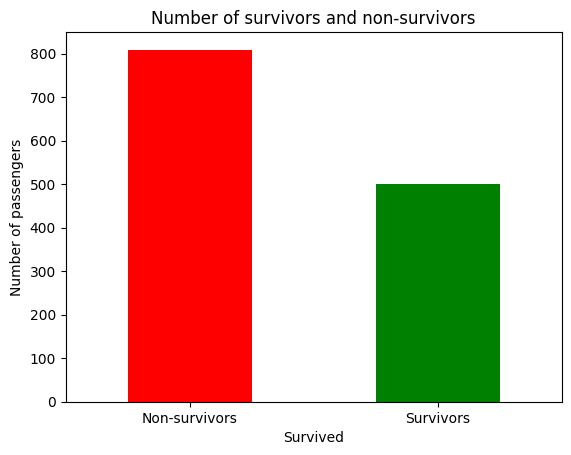

In [13]:
# Displaying the number of survivors and non-survivors and show it on a bar chart

# Displaying
# 1. The number of survivors and non-survivors
# 2. The percentage of survivors and non-survivors

print("\nNumber of survivors and non-survivors:")
print(df['survived'].value_counts())
print("\nPercentage of survivors and non-survivors:")
print(df['survived'].value_counts(normalize=True) * 100)

# Generate a bar chart

df['survived'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Number of survivors and non-survivors')
plt.xlabel('Survived')
plt.ylabel('Number of passengers')
plt.xticks([0, 1], ['Non-survivors', 'Survivors'], rotation=0)
plt.show()

### Na oko możemy powiedzieć, że stosunek osób uratowanych do osób, które nie przeżyły katastrofy wynosi 2:3


Histogram of the age column without missing values:


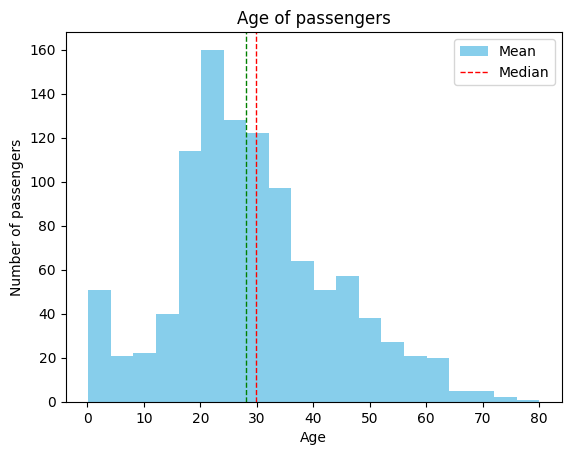

In [14]:
# Histogram of the age column withouth missing values and show mean and median

print("\nHistogram of the age column without missing values:")
df['age'].dropna().plot(kind='hist', bins=20, color='skyblue')
plt.title('Age of passengers')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.axvline(df['age'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df['age'].median(), color='green', linestyle='dashed', linewidth=1)
plt.legend({'Mean':df['age'].mean(),'Median':df['age'].median()})
plt.show()

### Zaskoczyła mnie bardzo duża ilość małych dzieci !!!


Number of passengers in each class:
3.0    709
1.0    323
2.0    277
Name: pclass, dtype: int64


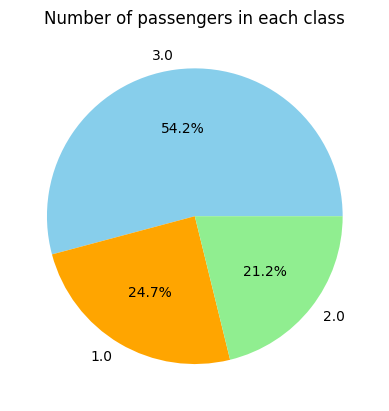

In [15]:
# Displaying the number of passengers in each class

print("\nNumber of passengers in each class:")
print(df['pclass'].value_counts())

# Pie chart of the number of passengers in each class

df['pclass'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange', 'lightgreen'])
plt.title('Number of passengers in each class')
plt.ylabel('')
plt.show()

### Ponad połowa pasażerów podróżowała w 3 klasie 


Displaying the number of siblings/spouses on board (SibSp Distribution):
0.0    891
1.0    319
2.0     42
4.0     22
3.0     20
8.0      9
5.0      6
Name: sibsp, dtype: int64

Histogram for the number of siblings/spouses on board:


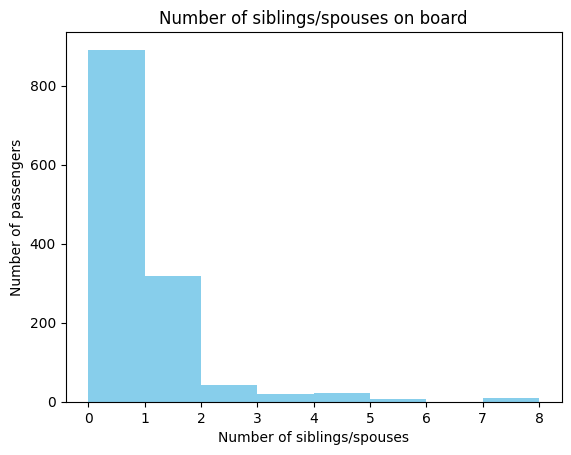

In [16]:
# Displaying the number of siblings/spouses on board

print("\nDisplaying the number of siblings/spouses on board (SibSp Distribution):")
print(df['sibsp'].value_counts())

# Histogram for the number of siblings/spouses on board

print("\nHistogram for the number of siblings/spouses on board:")
df['sibsp'].plot(kind='hist', bins=8, color='skyblue')
plt.title('Number of siblings/spouses on board')
plt.xlabel('Number of siblings/spouses')
plt.ylabel('Number of passengers')
plt.show()


Displaying the number of parents/children on board (Parch Distribution):
0.0    1002
1.0     170
2.0     113
3.0       8
4.0       6
5.0       6
6.0       2
9.0       2
Name: parch, dtype: int64

Histogram for the number of parents/children on board:


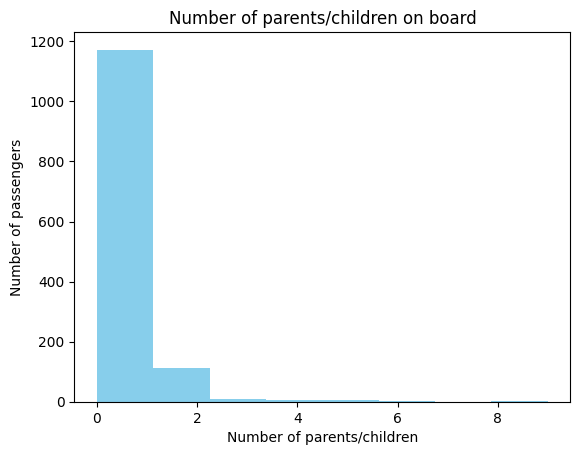

In [17]:
# Displaying the number of parents/children on board

print("\nDisplaying the number of parents/children on board (Parch Distribution):")
print(df['parch'].value_counts())

# Histogram for the number of parents/children on board

print("\nHistogram for the number of parents/children on board:")
df['parch'].plot(kind='hist', bins=8, color='skyblue')
plt.title('Number of parents/children on board')
plt.xlabel('Number of parents/children')
plt.ylabel('Number of passengers')
plt.show()

### Spora część osób podróżowała z innym członkiem rodziny


Cheapest and the most expensive ticket price for each class:
           min       max
pclass                  
1.0     5.0000  512.3292
2.0     9.6875   73.5000
3.0     3.1708   69.5500


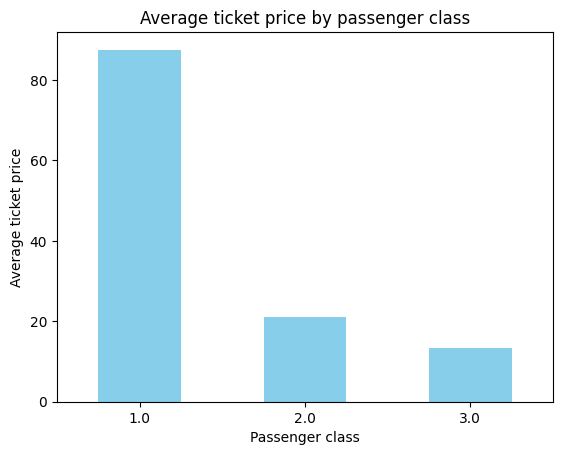

In [18]:
# Displaying the cheapest and the most expensive ticket price for each class (without values '0')

print("\nCheapest and the most expensive ticket price for each class:")
print(df[df['fare'] > 0].groupby('pclass')['fare'].agg(['min', 'max']))

# Bar chart for the average ticket price for each class

df.groupby('pclass')['fare'].mean().plot(kind='bar', color='skyblue')
plt.title('Average ticket price by passenger class')
plt.xlabel('Passenger class')
plt.ylabel('Average ticket price')
plt.xticks(rotation=0)
plt.show()


### Średnia cena biletu dla 2 i 3 klasy aż tak bardzo się nie różniła, za to 1 klasa mocno odbiegała od pozostałych 2 - można powiedzieć, że przepaść

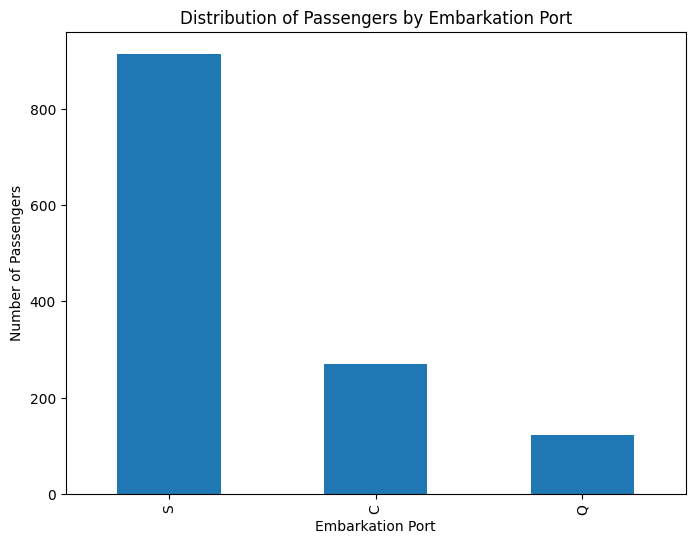

In [19]:
# Distribution of passengers by embarkation port
embarked_counts = df['embarked'].value_counts()

# Plot the distribution
embarked_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Distribution of Passengers by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Number of Passengers')
plt.show()

### Większość pasażerów na pokładzie Titanica zaokrętowała się w Southampton, który był głównym portem, z którego Titanic wyruszył, co tłumaczy dużą liczbę pasażerów zaokrętowanych właśnie w tym miejscu. 

In [20]:
# Displaying the top 10 home destinations (home.dest) of the passengers

print("\nTop 10 home destinations of the passengers:")
print(df['home.dest'].value_counts().head(10))


Top 10 home destinations of the passengers:
New York, NY                            64
London                                  14
Montreal, PQ                            10
Paris, France                            9
Cornwall / Akron, OH                     9
Wiltshire, England Niagara Falls, NY     8
Winnipeg, MB                             8
Philadelphia, PA                         8
Belfast                                  7
Sweden Winnipeg, MN                      7
Name: home.dest, dtype: int64


### Ciężko jednoznacznie stwierdzić czy ta kolumna wskazuje na cel podróży czy miejsce pochodzenia osób, które wzięły udział w rejsie. Z jednej strony New York wskazuje jakoby było to miejsce przeznaczenia podróżujących (ze względu na kierunek, w którym płynął statek) a z drugiej strony miasta w zestawieniu takie jak London czy Paris wskazują jakoby na pochodzenie podróżujących.

In [21]:
# Displaying unique values in the boat column without missing values

print("\nUnique values in the boat column without missing values:")
print(df['boat'].dropna().unique())


Unique values in the boat column without missing values:
['2' '11' '3' '10' 'D' '4' '9' '6' 'B' '8' 'A' '5' '7' 'C' '14' '5 9' '13'
 '1' '15' '5 7' '8 10' '12' '16' '13 15 B' 'C D' '15 16' '13 15']


### Przypisanie kilku nr łodzi do jednej osoby? Błędy wynikające z chaosu podczas ewakuacji? Ludzie się przesiadali?

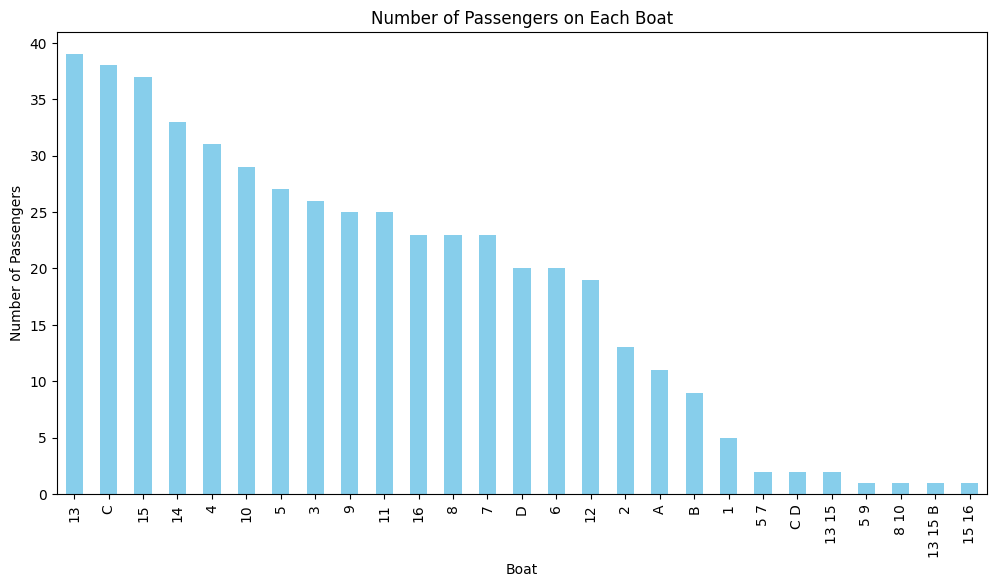

In [22]:
# Bar chart for the number of passengers on each boat

df['boat'].value_counts().plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Number of Passengers on Each Boat')
plt.xlabel('Boat')
plt.ylabel('Number of Passengers')
plt.show()

### Łodzie ratunkowe o numerach 13 oraz C miały najwięcej pasażerów (około 35-40 osób), co może wskazywać na maksymalne wypełnienie tych łodzi. Widać też znaczną różnicę w liczbie pasażerów na różnych łodziach. Niektóre łodzie były wypełnione w mniejszym stopniu (np. łodzie B, 1, czy A), co może być wynikiem paniki podczas ewakuacji lub mniejszej ich pojemności.

## 4. Transformacja danych

In [23]:
# Apply one-hot encoding to 'sex' and 'pclass' column

df_dummie = pd.get_dummies(df, columns=['sex', 'pclass'])

In [24]:
# Displaying the random 10 rows of the dataset after applying one-hot encoding

print("\nRandom 10 rows of the dataset after applying one-hot encoding:")
df_dummie.sample(10)


Random 10 rows of the dataset after applying one-hot encoding:


,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male,pclass_1.0,pclass_2.0,pclass_3.0
1157,0.0,"Rosblom, Mr. Viktor Richard",18.00,1.0,1.0,370129,20.2125,NaN,S,NaN,NaN,NaN,0,1,0,0,1
658,1.0,"Baclini, Miss. Helene Barbara",0.75,2.0,1.0,2666,19.2583,NaN,C,C,NaN,"Syria New York, NY",1,0,0,0,1
513,1.0,"Nasser, Mrs. Nicholas (Adele Achem)",14.00,1.0,0.0,237736,30.0708,NaN,C,NaN,NaN,"New York, NY",1,0,0,1,0
643,1.0,"Asplund, Miss. Lillian Gertrud",5.00,4.0,2.0,347077,31.3875,NaN,S,15,NaN,"Sweden Worcester, MA",1,0,0,0,1
434,1.0,"Hart, Miss. Eva Miriam",7.00,0.0,2.0,F.C.C. 13529,26.2500,NaN,S,14,NaN,"Ilford, Essex / Winnipeg, MB",1,0,0,1,0
1230,0.0,"Strom, Miss. Telma Matilda",2.00,0.0,1.0,347054,10.4625,G6,S,NaN,NaN,NaN,1,0,0,0,1
1221,0.0,"Staneff, Mr. Ivan",NaN,0.0,0.0,349208,7.8958,NaN,S,NaN,NaN,NaN,0,1,0,0,1
1136,0.0,"Rasmussen, Mrs. (Lena Jacobsen Solvang)",NaN,0.0,0.0,65305,8.1125,NaN,S,NaN,NaN,NaN,1,0,0,0,1
1282,0.0,"Ware, Mr. Frederick",NaN,0.0,0.0,359309,8.0500,NaN,S,NaN,NaN,NaN,0,1,0,0,1
55,1.0,"Carter, Miss. Lucile Polk",14.00,1.0,2.0,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA",1,0,1,0,0


### Zrobiliśmy transformację one-hot encoding dla kolumn 'sex' i 'pclass' aby wykorzystać również je do tworzenia później macierzy korelacji na danych numerycznych. Być może uzyskamy z nimi jakieś ciekawe korelacje
#### Ze względu na późniejszą macierz korelacji specjalnie zostawiłem wszystkie kolumny (nie zrobiłem drop_first)

## 5. Analiza relacji między zmiennymi

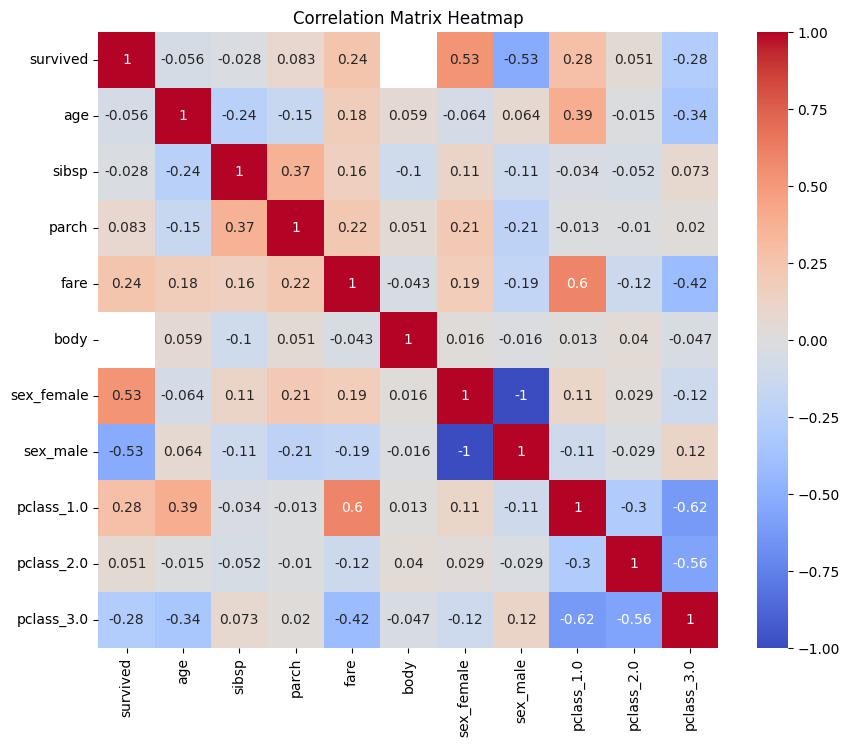

In [25]:
# Heatmap of the correlation matrix of the numeric columns

# Calculate the correlation matrix for the filtered DataFrame
correlation_matrix = df_dummie.corr(numeric_only=True)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

### WNIOSKI
- Korelacja między zmienną survived a sex_female wynosi 0.53, co sugeruje, że kobiety miały większe szanse na przeżycie
- Zauważalna jest silna negatywna korelacja między zmienną fare a pclass_3.0 (-0.42) oraz pozytywna korelacja z pclass_1.0 (0.6). Oznacza to, że osoby, które zapłaciły więcej za bilet, częściej podróżowały w pierwszej klasie, a osoby płacące mniej podróżowały w trzeciej klasie. 
- Istnieje negatywna korelacja między zmienną survived a pclass_3.0 (-0.28), co sugeruje, że osoby podróżujące w trzeciej klasie miały mniejsze szanse na przeżycie.
Z kolei pozytywna korelacja z pclass_1.0 (0.28) wskazuje, że osoby z pierwszej klasy miały większe szanse na przeżycie.
- Występuje negatywna korelacja między zmienną age a pclass_3.0 (-0.34), co może sugerować, że osoby młodsze częściej podróżowały w trzeciej klasie.
- Istnieje dość silna pozytywna korelacja (0.37) między zmiennymi parch (liczba rodziców/dzieci na pokładzie) a sibsp (liczba rodzeństwa/małżonków na pokładzie). To sugeruje, że osoby podróżujące z rodzinami często miały zarówno dzieci, jak i rodzeństwo/małżonków na pokładzie.

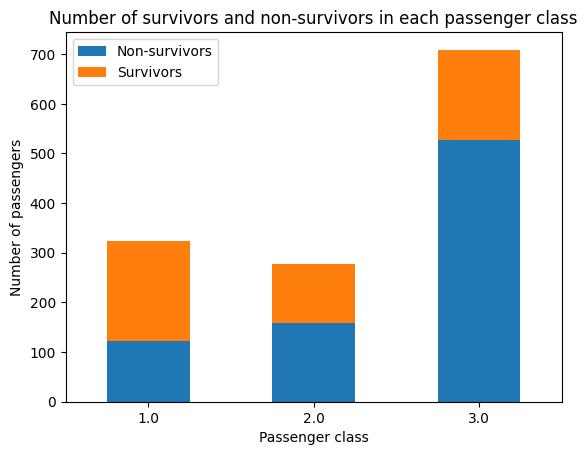

In [26]:
# Displaying the number of survivors and non-survivors in each passenger class

df.groupby('pclass')['survived'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Number of survivors and non-survivors in each passenger class')
plt.xlabel('Passenger class')
plt.ylabel('Number of passengers')
plt.xticks(rotation=0)
plt.legend(['Non-survivors', 'Survivors'])
plt.show()

### Tutaj tak jak myślałem - procentowo najwięcej osób przeżyło z 1 klasy a najmniej z 3 (smutne)

In [27]:
# Displaying percentage of survivors and non-survivors in each sex group

print("\nPercentage of survivors and non-survivors in each sex group:")
df.groupby('sex')['survived'].value_counts(normalize=True) * 100


Percentage of survivors and non-survivors in each sex group:


sex     survived
female  1.0         72.746781
        0.0         27.253219
male    0.0         80.901542
        1.0         19.098458
Name: survived, dtype: float64

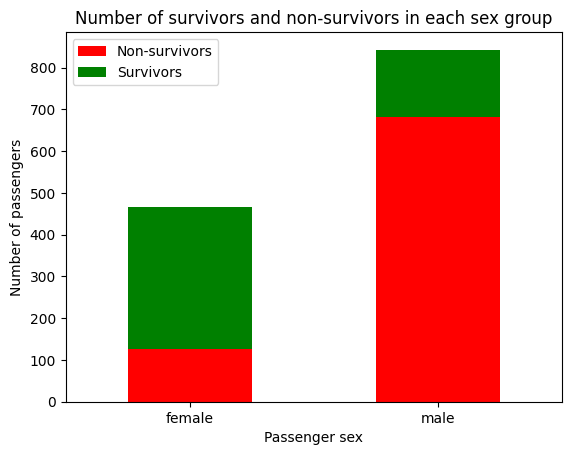

In [28]:
# Bar plot for the number of survivors and non-survivors in each sex group

df.groupby('sex')['survived'].value_counts().unstack().plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Number of survivors and non-survivors in each sex group')
plt.xlabel('Passenger sex')
plt.ylabel('Number of passengers')
plt.xticks(rotation=0)
plt.legend(['Non-survivors', 'Survivors'])
plt.show()

### Zdecydowana większość kobiet przeżyła (około 73%), czego nie można powiedzieć o mężczyznach (tylko około 19%). W sumie na pokładzie było więcej mężczyzn niż kobiet, co jest widoczne na wykresie, gdzie całkowita liczba mężczyzn (sumując czerwony i zielony segment) jest większa niż liczba kobiet. Mężczyźni stanowili większy procent ofiar, co może wynikać z różnych czynników, takich jak miejsce na pokładzie (robotnicy na dolnych pokładach, które szybciej zalała woda) jak również priorytety w ewakuacji - większość kobiet na pokładzie przeżyła, co jest zgodne z zasadą "kobiety i dzieci najpierw", która mogła być stosowana podczas ewakuacji.

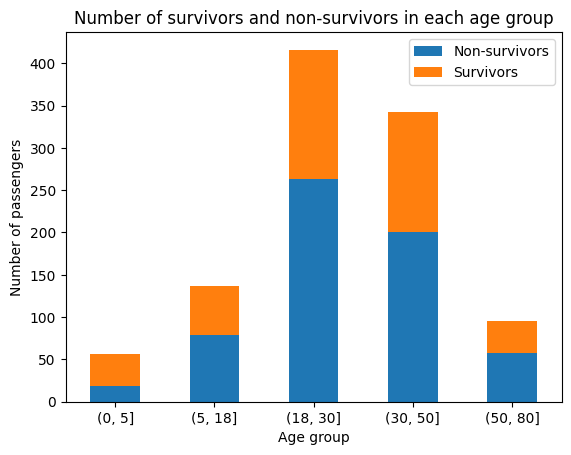

In [29]:
# Displaying the number of survivors and non-survivors in each age group

age_bins = pd.cut(df['age'], bins=[0, 5, 18, 30, 50, 80])
df.groupby(age_bins)['survived'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Number of survivors and non-survivors in each age group')
plt.xlabel('Age group')
plt.ylabel('Number of passengers')
plt.xticks(rotation=0)
plt.legend(['Non-survivors', 'Survivors'])
plt.show()

### Zasada "kobiety i dzieci najpierw", która mogła być stosowana podczas ewakuacji sprawdza się również w przypadku dzieci do lat 5

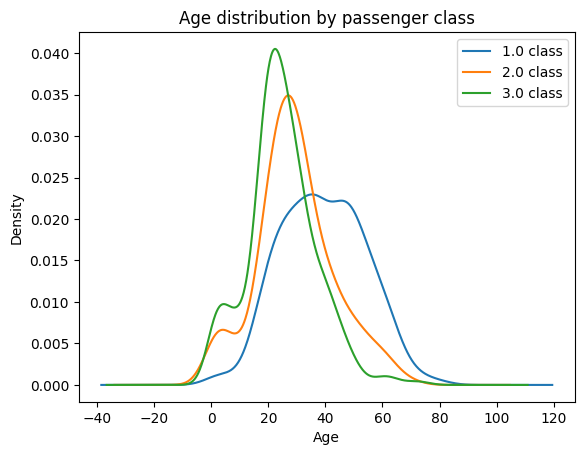

In [30]:
# Displaying the distribution of the 'age' variable depending on the ticket class

# Iterate over each group and plot the KDE for 'age'
for name, group in df.groupby('pclass'):
    group['age'].dropna().plot(kind='kde', label=f'{name} class')

# Add title and labels
plt.title('Age distribution by passenger class')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

### Ciekawa zależność - pierwsza klasa miała bardziej zróżnicowany wiekowo profil pasażerów, z większą liczbą starszych osób, co może sugerować, że bardziej zamożne osoby były również starsze, zaś trzecia klasa była zdominowana przez młodszych pasażerów, co może odzwierciedlać niższy status ekonomiczny tych pasażerów (którzy byli osobami szukającymi lepszych warunków życia w nowym kraju?)

## 6. Analiza wartości odstających

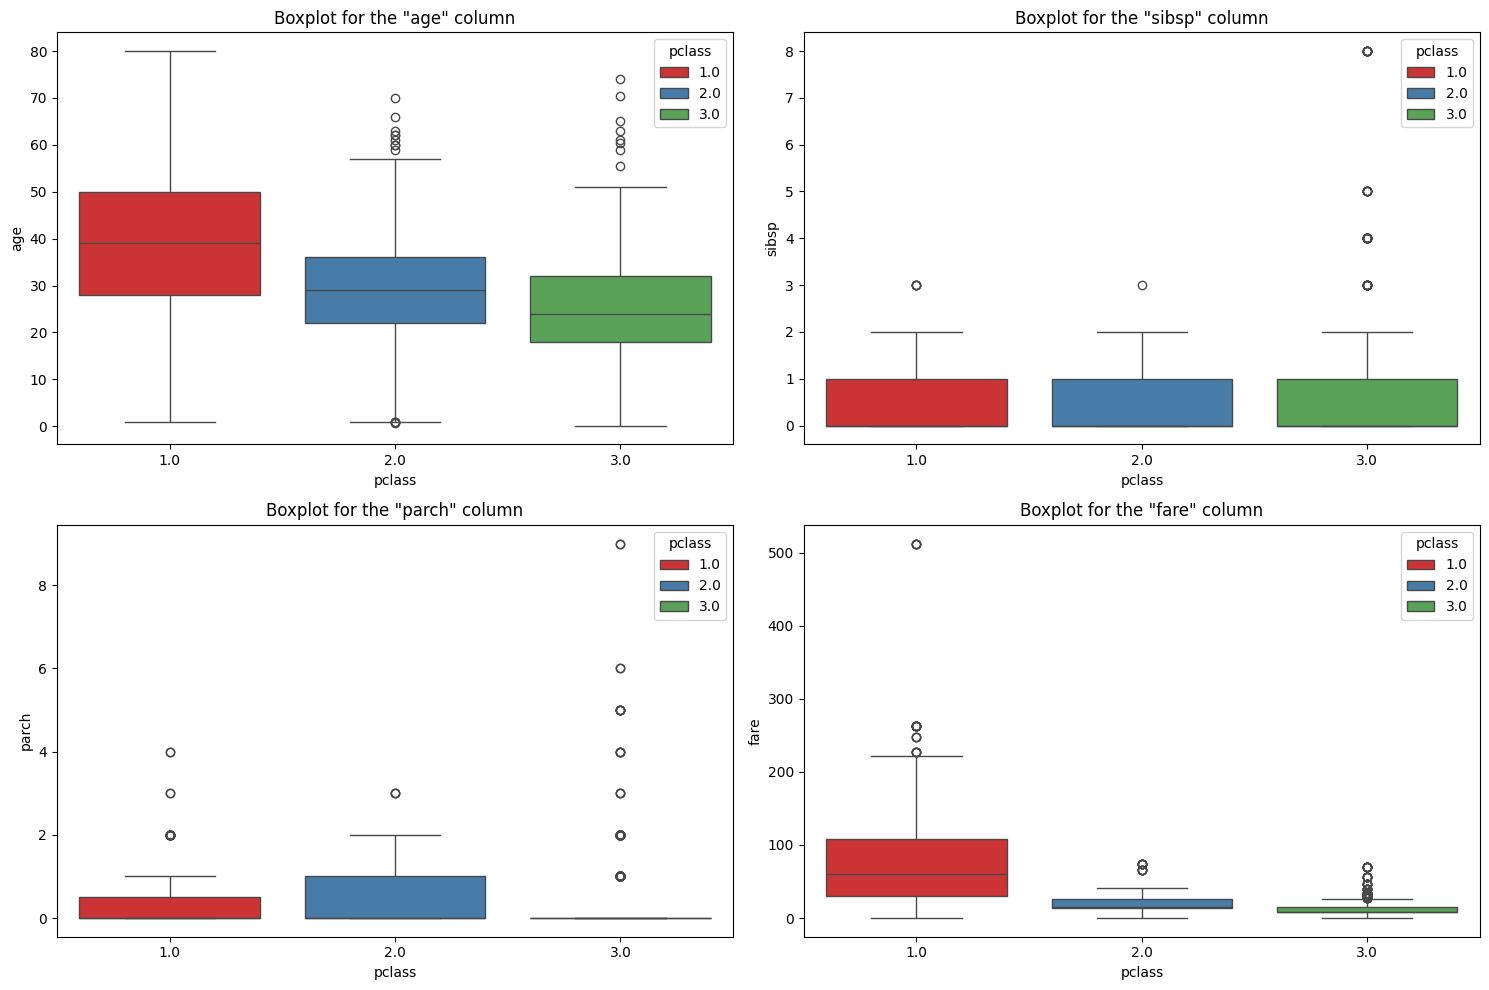

In [31]:
# List of numeric columns
numeric_columns = ['age', 'sibsp', 'parch', 'fare']

# Generating boxplots in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Create a box plot for each numeric_column grouped by 'pclass'
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    sns.boxplot(x='pclass', y=column, data=df, ax=ax, hue='pclass', palette='Set1', dodge=False)
    ax.set_title(f'Boxplot for the "{column}" column')
    ax.set_xlabel('pclass')
    ax.set_ylabel(column)

plt.tight_layout()
plt.show()

#### Wartości odstające ze względu na wiek mogą sugerować, że w drugiej i trzeciej klasie podróżowały rodziny z małymi dziećmi, co mogło być mniej powszechne w pierwszej klasie. Ze względu na liczbę rodzeństwa/małżonków wartości odstające mogą sugerować, że choć większość pasażerów podróżowała samotnie lub z jednym towarzyszem, niektórzy podróżowali z większymi grupami rodzinnymi. Jeśli zaś chodzi o liczbę rodziców/dzieci - w trzeciej klasie były większe rodziny, co jest zgodne z oczekiwaniami, że w tej klasie mogło być więcej wielodzietnych rodzin. Wartości odstające w przypadku ceny biletu w pierwszej klasie mogą odzwierciedlać bilety na najbardziej luksusowe kabiny, które były bardzo kosztowne. 

## Wnioski końcowe

1. **Rozkład pasażerów według klasy**:
   Większość pasażerów podróżowała w trzeciej klasie, co może wskazywać na większą dostępność biletów w tej klasie dla osób o niższych dochodach. Może to również odzwierciedlać pierwotne założenia przy konstruowaniu statku, gdzie przewidywano większą liczbę miejsc w trzeciej klasie, aby zaspokoić popyt ze strony mniej zamożnych pasażerów. Jednocześnie mniejsza liczba luksusowych kabin w pierwszej klasie była planowana z myślą o bardziej ekskluzywnej ofercie dla najbogatszych pasażerów, co wpływało na tak ogromną dysproporcję pomiędzy klasami.

2. **Rozkład wieku pasażerów**:
   Rozkład wieku pasażerów pokazuje, że na pokładzie znajdowały się osoby w różnym wieku, z wyraźnym skupieniem w przedziale 20-40 lat.

3. **Przeżywalność pasażerów**:
   Analiza przeżywalności wskazuje, że pasażerowie pierwszej klasy mieli wyższe szanse na przeżycie w porównaniu do pasażerów drugiej i trzeciej klasy. Kobiety i dzieci miały wyższe szanse na przeżycie niż mężczyźni, co może być związane z zasadą "kobiety i dzieci najpierw".

4. **Analiza cen biletów**:
   Ceny biletów były zróżnicowane w zależności od klasy kabiny, przy czym pasażerowie pierwszej klasy płacili znacznie więcej niż pasażerowie trzeciej klasy. Istnieje związek między ceną biletu a przeżywalnością, gdzie wyższe ceny biletów były związane z wyższymi szansami na przeżycie.